In [19]:
s = """
Titanic Machine learning from disaster

Columns     DESCRIPTION:
survival	Survival	            0 = No, 1 = Yes
pclass      Ticket class	        1 = 1st, 2 = 2nd, 3 = 3rd
sex	        Sex	
Age	        Age in years	
sibsp	    # of siblings / spouses aboard the Titanic	
parch	    # of parents / children aboard the Titanic	
ticket	    Ticket number	
fare	    Passenger fare	
cabin	    Cabin number	
embarked	Port of Embarkation	    C = Cherbourg, Q = Queenstown, S = Southampton

"""
print(s)


Titanic Machine learning from disaster

Columns     DESCRIPTION:
survival	Survival	            0 = No, 1 = Yes
pclass      Ticket class	        1 = 1st, 2 = 2nd, 3 = 3rd
sex	        Sex	
Age	        Age in years	
sibsp	    # of siblings / spouses aboard the Titanic	
parch	    # of parents / children aboard the Titanic	
ticket	    Ticket number	
fare	    Passenger fare	
cabin	    Cabin number	
embarked	Port of Embarkation	    C = Cherbourg, Q = Queenstown, S = Southampton




In [65]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings(action = 'ignore')

In [14]:
PATH = "..\Titanic - Machine learning from disaster\\titanic"
    
FILES = os.listdir(PATH)

xTrain = pd.read_csv(PATH + "\\" + FILES[2])

xTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
Cols_notNeeded = ['Name', 'PassengerId', 'Ticket']
_xTrain = xTrain.drop(Cols_notNeeded, inplace = False, axis  = 1)

_xTrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [64]:
# Survival based on gender
maleSurvived = xTrain[xTrain['Sex'] == 'male'][xTrain['Survived'] == 1]
femaleSurvived = xTrain[xTrain['Sex'] == 'female'][xTrain['Survived'] == 1]

totalMale = xTrain[xTrain['Sex'] == 'male']
totalFemale = xTrain[xTrain['Sex'] == 'female']

survivors = (maleSurvived.shape[0], femaleSurvived.shape[0])
total = (totalMale.shape[0], totalFemale.shape[0])

print("%age of Male survivor:{}\n%age of female survivor{}\n".format( survivors[0]*100/total[0], survivors[1]*100/total[1] ))

%age of Male survivor:18.890814558058924
%age of female survivor74.20382165605096



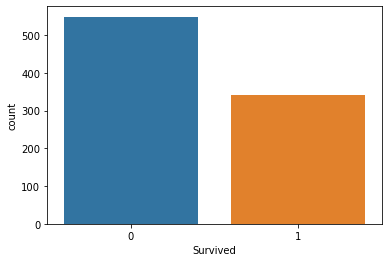

In [73]:
#data = 
sns.countplot(x = 'Survived', data = xTrain, label = 'Sex')
plt.show()
#sns.legend()